In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

## Trabajo práctico N° 1 2018: Análisis exploratorio

#### Integrantes
<ul>
    <li>Aguilar, Agustín</li>
    <li>Ferrari, Nicolás</li>
    <li>Sosa, Emiliano</li>
</ul>

### Dataset seleccionado: Boxing bouts
El dataset presenta datos pertenecientes a peleas de boxeo. Acompañado a ésta podemos encontrar el resultado de la misma.
<img src="img/dos-guantes-de-boxeo.svg" width="220px">

In [2]:
df = pd.read_csv("bouts_out_new.csv")

#### Diccionario de datos:
<table width="100%">
  <tr>
    <th>Nombre variable</th>
    <th>Descripción</th>
    <th>Valores Posibles</th>
  </tr>
  <tr>
    <td>age_A y age_B</td>
    <td>Edad del boxeador a y b</td>
    <td>en años</td>
  </tr>
  <tr>
    <td>height_A y height_B</td>
    <td>Altura del boxeador a y b</td>
    <td>en cm</td>
  </tr>
  <tr>
    <td>reach_A y reach_b</td>
    <td>Distancia de una mano a la otra con los brazos estirados</td>
    <td>en cm</td>
  </tr>
  <tr>
    <td>stance_A y stance_B</td>
    <td>Postura de los boxeadores</td>
    <td>orthodox/southpaw</td>
  </tr>
  <tr>
    <td>weight_A, weight_B</td>
    <td>Peso de los boxeadores</td>
    <td>en libras</td>
  </tr>
  <tr>
    <td>won_A, won_B</td>
    <td>N° de victorias pasadas</td>
    <td></td>
  </tr>
  <tr>
    <td>lost_A y lost_B</td>
    <td>N° de derrotas pasadas</td>
    <td></td>
  </tr>
  <tr>
    <td>drawn_A y drawn_B</td>
    <td>N° de empates pasados</td>
    <td></td>
  </tr>
  <tr>
    <td>result</td>
    <td>Resultado del combate</td>
    <td>win_A/win_B/draw</td>
  </tr>
  <tr>
    <td>decision</td>
    <td>Tipo de decisión del jurado</td>
    <td>SD (decisión dividida), MD (decisión de la mayoria), UD (decisión unánime), KO: (knock out), TKO (knock out tecnico), DQ (descalificado), RTD (adversario se retira)</td>
  </tr>
      <tr>
    <td>judge</td>
    <td>Puntaje de los 3 jurados</td>
    <td>en cm</td>
  </tr>
</table>

Más adelante daremos a conocer el diccionario de datos final para usar en nuestro modelo

### Variable de salida
Queremos predecir, <b>dada las diferencias entre carácteristicas de un boxeador y su adversario (diferencia de altura por ejemplo) si va a ganar o no</b>. Para ello, necesitaremos generar nuestra columna de salida, en este caso haremos referencia a que el boxeador ganó cuando A gana y que perdió cuando A no gana. Esto podría ser a la inversa ya que tenemos un dataset de "victorias de peleas de boxeo".
Los valores posibles que puede tomar son 1 si gano, y 0 si no ganó.

In [3]:
rename_columns = {
    'age_A': 'edad_a', 'age_B': 'edad_b', 'height_A': 'altura_a', 
    'height_B': 'altura_b', 'reach_A': 'alcance_mano_a',
    'reach_B': 'alcance_mano_b', 'stance_A': 'posicion_a', 'stance_B': 'posicion_b',
    'weight_A': 'peso_a', 'weight_B': 'peso_b', 'won_A': 'ganadas_a', 'won_B': 'ganadas_b',
       'lost_A': 'perdidas_a', 'lost_B': 'perdidas_b', 'drawn_A': 'empatadas_a', 'drawn_B':'empatadas_b',
    'kos_A': 'kos_a', 'kos_B': 'kos_b', 'result': 'resultado', 'decision': 'decision',
    'judge1_A': 'juez1_a', 'judge1_B': 'juez1_b', 'judge2_A': 'juez2_a', 'judge2_B': 'juez2_b', 
    'judge3_A': 'juez3_a', 'judge3_B': 'juez3_b'
}
df.rename(columns=rename_columns, inplace=True)


In [4]:
df["gano"] = df.resultado == 'win_A'

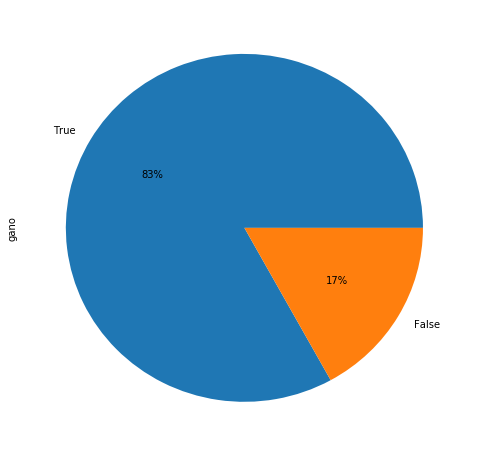

In [5]:
df.gano.value_counts().plot.pie(autopct='%1.0f%%', figsize=(8,8))

Los datos se encuentran desbalanceados, ya que el 81% de los mismos corresponde a una victoria por parte del boxeador A, y solo el 19% de los datos corresponden a victoria del boxeador B.

Como consecuencia, el modelo tendrá dificultades a la hora de predecir una derrota.

### Valores nulos

In [6]:
df.isnull().sum()

edad_a             34539
edad_b            129492
altura_a          138181
altura_b          252787
alcance_mano_a    275085
alcance_mano_b    349554
posicion_a        156418
posicion_b        156418
peso_a            251854
peso_b            257069
ganadas_a              0
ganadas_b              0
perdidas_a             0
perdidas_b             0
empatadas_a            0
empatadas_b            0
kos_a                  0
kos_b                 79
resultado              0
decision               0
juez1_a           335179
juez1_b           335367
juez2_a           317056
juez2_b           317395
juez3_a           326196
juez3_b           326404
gano                   0
dtype: int64

### Anlizamos las variables de edad
Trataremos de tener una visión de las edades de los boxeadores con respecto a si gano o no.

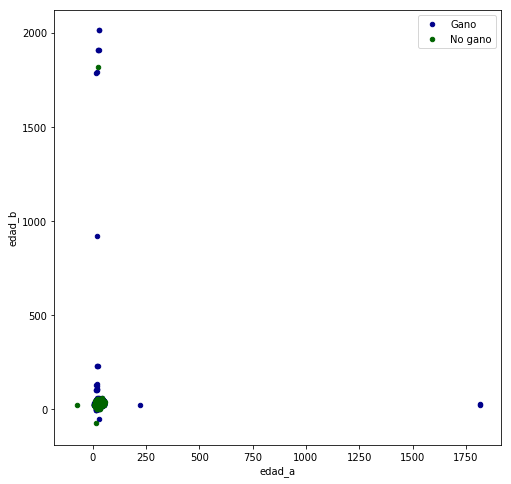

In [7]:
ax = df[df.gano==1].plot.scatter(x='edad_a', y='edad_b', color='DarkBlue', label='Gano',figsize=(8,8));
df[df.gano==0].plot.scatter(x='edad_a', y='edad_b', color='DarkGreen', label='No gano', ax=ax,  figsize=(8,8));

El siguiente gráfico deja en evidencia la presencia de outliers, por lo tanto vamos a poceder a eliminarlos. También, como vimos anteriormente, hay muchos valores nulos en la edad. Teniendo en cuenta que con el resto de las variables es muy dificil inferir valores de edad, vamos a eliminarlos también.

In [8]:
df = df.drop(df[(df['edad_a'] >= 75) | (df['edad_b'] >= 75)].index)
df = df.drop(df[(df['edad_a'] <= 16) | (df['edad_b'] <= 16)].index)

df = df.drop(df[(df['edad_a'].isnull()) | (df['edad_b'].isnull())].index)

### Anlizamos las variables de altura
Trataremos de tener una visión de las alturas de los boxeadores con respecto a si gano o no.

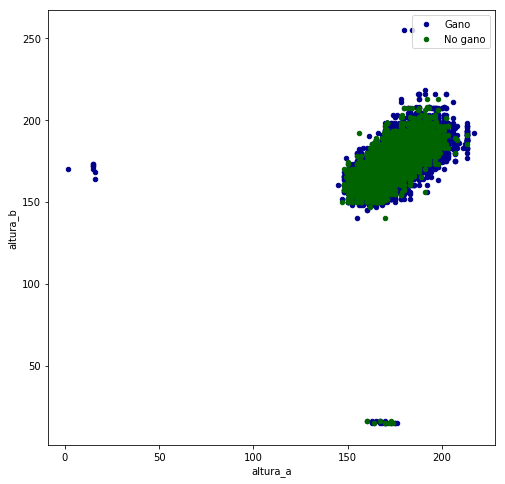

In [9]:
ax = df[df.gano==1].plot.scatter(x='altura_a', y='altura_b', color='DarkBlue', label='Gano',figsize=(8,8));
df[df.gano==0].plot.scatter(x='altura_a', y='altura_b', color='DarkGreen', label='No gano', ax=ax,  figsize=(8,8));

El siguiente gráfico deja en evidencia la presencia de outliers, por lo tanto vamos a poceder a eliminarlos. También, como vimos anteriormente, hay muchos valores nulos en la altura. Teniendo en cuenta que con el resto de las variables es muy dificil inferir valores de edad, vamos a eliminarlos también.

In [10]:
df = df.drop(df[(df['altura_a'] <= 100) | (df['altura_b'] <= 100)].index)
df = df.drop(df[(df['altura_a'] >= 250) | (df['altura_b'] >= 250)].index)

df = df.drop(df[(df['altura_a'].isnull()) | (df['altura_b'].isnull())].index)

In [11]:
df["diff_altura_a_b"] = df["altura_a"] - df["altura_b"]

### Variables que no vamos a usar
Algunas de las variables que no vamos a utilizar son decision, juez1_a, juez1_b, juez2_a, juez2_b, juez3_a, juez3_b. Esto se debe a que implicitamente está diciendo el resultado de la pelea. El modelo podría darse cuenta de esto y sobreentrenar.

In [12]:
df = df.drop(["decision", "juez1_a", "juez1_b", "juez2_a", "juez2_b", "juez3_a", "juez3_b"], axis=1)

Además, el alcance de una mano a otra con los brazos estirados es igual o muy parecida a la altura. Esto significaría darle al modelo datos redundantes

In [13]:
df = df.drop(["alcance_mano_a", "alcance_mano_b"], axis=1)

Creemos que las peleas empatadas historícas no nos van a dar una idea de si el boxeador puede llegar a ganar o no.

In [14]:
df = df.drop(["empatadas_a", "empatadas_b"], axis=1)

### Variables de entrada
A nuestras variables de entradas <b>vamos a tener que generarlas a partir de las variables que tenemos</b> actualmente en el dataset. Esto se debe a que si le pasamos tal cual está la data al modelo, seguramente tarde demasiado en converger. Por ejemplo: actualmente tenemos la edad de A y B en columnas separas, si queremos predecir si A gano a B, vamos a tener que generar una columna que haga referencia a la 'diferencia de edad entre A y B'.

#### 1) Analizaremos la diferencia entre las edades

In [15]:
df['diff_edad_a_b'] = df.edad_a - df.edad_b


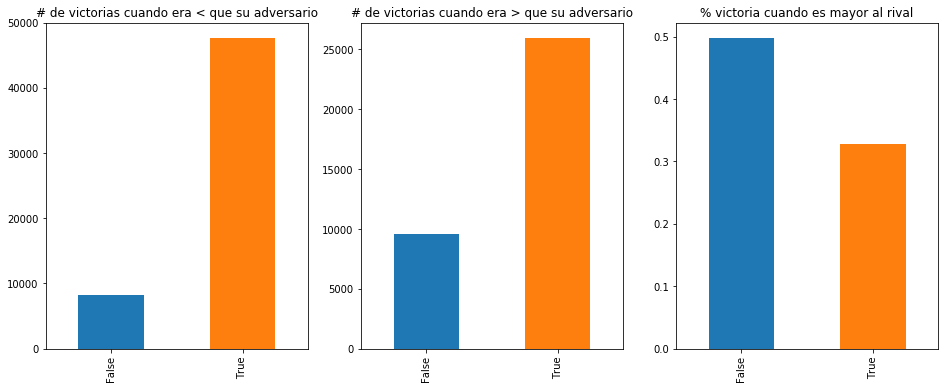

In [16]:
f,ax=plt.subplots(1,3,figsize=(16,6))
ax[0].set_title("# de victorias cuando era < que su adversario")
df[df.diff_edad_a_b<0].gano.value_counts().sort_index().plot.bar(ax=ax[0])
ax[1].set_title('# de victorias cuando era > que su adversario')
df[df.diff_edad_a_b>0].gano.value_counts().sort_index().plot.bar(ax=ax[1])
ax[2].set_title('% victoria cuando es mayor al rival')
(df[df.diff_edad_a_b > 0].gano.value_counts().sort_index() / df.gano.value_counts().sort_index()).plot.bar(ax=ax[2])

 En el primer gráfico podemos observar que hay mayor cantidad de victorias cuando el boxeador es menor a su rival.
 En el segundo gráfico podemos denotar que hay más victorias cuando el boxeador es mayor a su rival, lo cuál podría llegar a contradecir la afirmación anterior. Para eso, haremos un gráfico porcentual.
 En el tercer gráfico podemos ver que el porcentaje de victorias cuando el boxeador es más grande que su adversario en edad es menor que si que si fuera más chico. <b>Está variable, será una entrada para nuestro modelo.</b>

#### 2) Analizaremos la diferencia entre los pesos.
Mirando los datos, podemos generar la hipótesis de que el peso no va a inferir ya que los boxeadores siempre pelean con adversarios que tienen el mismo peso, veamos si esto es cierto:

In [17]:
df['diff_peso_a_b'] = df.peso_a - df.peso_b

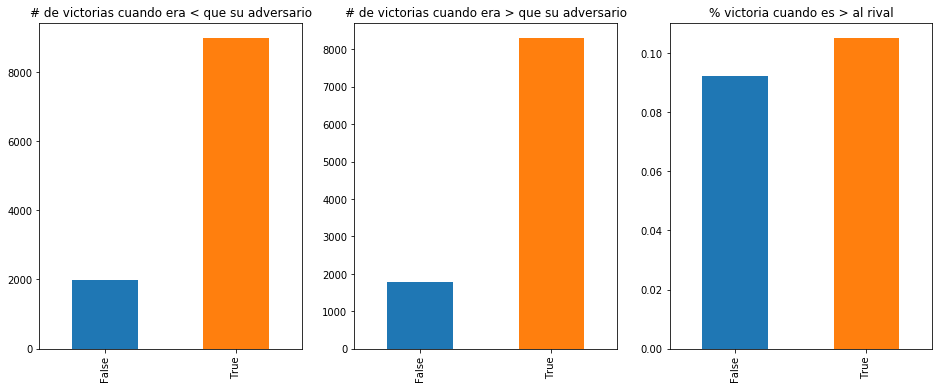

In [18]:
f,ax=plt.subplots(1,3,figsize=(16,6))
ax[0].set_title("# de victorias cuando era < que su adversario")
df[df.diff_peso_a_b<0].gano.value_counts().sort_index().plot.bar(ax=ax[0])
ax[1].set_title('# de victorias cuando era > que su adversario')
df[df.diff_peso_a_b>0].gano.value_counts().sort_index().plot.bar(ax=ax[1])
ax[2].set_title('% victoria cuando es > al rival')
(df[df.diff_peso_a_b > 0].gano.value_counts().sort_index() / df.gano.value_counts().sort_index()).plot.bar(ax=ax[2])

Tal como describimos en nuestra hipótesis, la diferencia que existe porcentualmente entra las victorias y derrotas cuando difiere el peso es apenas del 2%, lo cual no consideramos que sea significante. <b>Descartamos el peso</b>

In [19]:
df = df.drop(["peso_a", "peso_b", "diff_peso_a_b"], axis=1)

#### 3) Analizaremos los knockouts

In [20]:
df['diff_kos_a_b'] = df.kos_a - df.kos_b

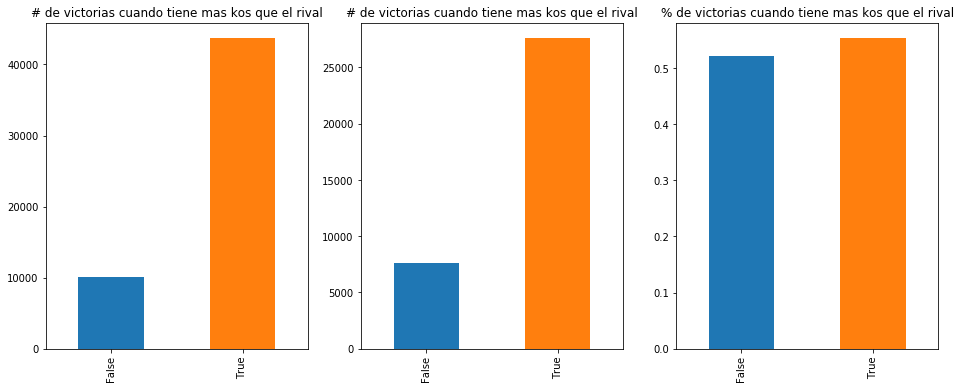

In [21]:
f,ax=plt.subplots(1,3,figsize=(16,6))
ax[0].set_title('# de victorias cuando tiene mas kos que el rival')
df[df.diff_kos_a_b>0].gano.value_counts().sort_index().plot.bar(ax=ax[0])
ax[1].set_title('# de victorias cuando tiene mas kos que el rival')
df[df.diff_kos_a_b<0].gano.value_counts().sort_index().plot.bar(ax=ax[1])
ax[2].set_title('% de victorias cuando tiene mas kos que el rival')
(df[df.diff_kos_a_b > 0].gano.value_counts().sort_index() / df.gano.value_counts().sort_index()).plot.bar(ax=ax[2])

La diferencia porcentual es del 5%. Eso se puede deber a que la diferencia de knockouts era de -1 y fue victoria. Esto es algo muy común ya que no generaría más probabilidad de victoria en un boxeador tener una diferencia de 1 KO. A su vez, están los casos en los cuales la diferencia de KO era de 120, por ejemplo, y fue victoria, lo cual resulta más obvia la tendencia a la victoria. <b>Vamos a incluir en las variables de entrada a la diferencia de KOS</b>

#### 4) Análisis de victorias históricas

In [22]:
df['diff_ganadas_a_b'] = df.ganadas_a - df.ganadas_b

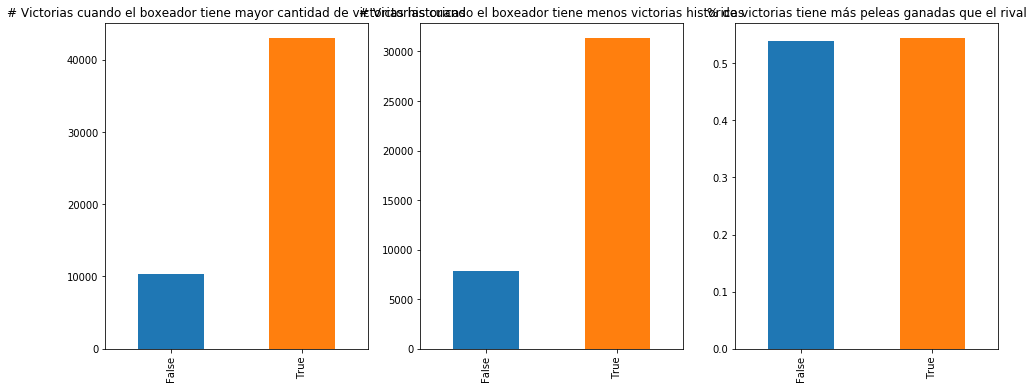

In [23]:
f,ax=plt.subplots(1,3,figsize=(16,6))
ax[0].set_title('# Victorias cuando el boxeador tiene mayor cantidad de victorias historicas')
df[df.diff_ganadas_a_b > 0].gano.value_counts().sort_index().plot.bar(ax=ax[0])
ax[1].set_title('# Victorias cuando el boxeador tiene menos victorias historicas')
df[df.diff_ganadas_a_b < 0].gano.value_counts().sort_index().plot.bar(ax=ax[1])
ax[2].set_title('% de victorias tiene más peleas ganadas que el rival')
(df[df.diff_ganadas_a_b > 0].gano.value_counts().sort_index() / df.gano.value_counts().sort_index()).plot.bar(ax=ax[2])

En esta gráfica podemos ver que si bien la diferencia porcentual es mínima, daría más probabilidades de victoria a un boxeador que ganó muchas peleas. <b>Consideraremos como variable de entrada las victorias históricas</b>

#### 5) Análisis de pérdidas histŕocias

In [24]:
df['diff_perdidas_a_b'] = df.perdidas_a - df.perdidas_b

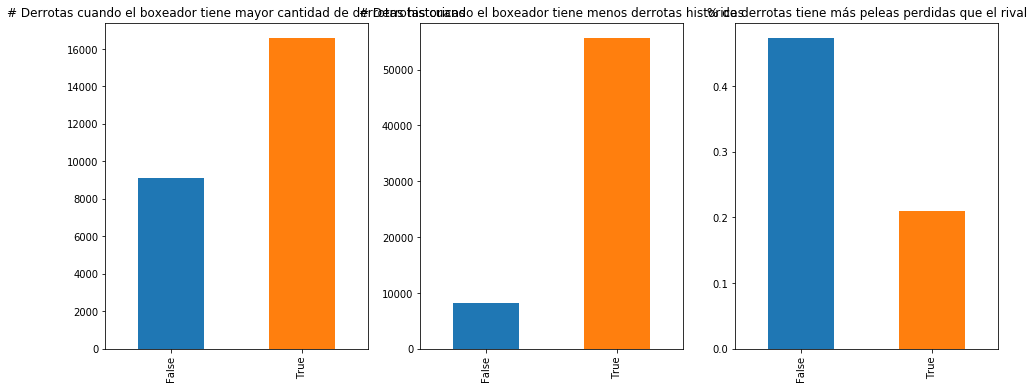

In [25]:
f,ax=plt.subplots(1,3,figsize=(16,6))
ax[0].set_title('# Derrotas cuando el boxeador tiene mayor cantidad de derrotas historicas')
df[df.diff_perdidas_a_b > 0].gano.value_counts().sort_index().plot.bar(ax=ax[0])
ax[1].set_title('# Derrotas cuando el boxeador tiene menos derrotas historicas')
df[df.diff_perdidas_a_b < 0].gano.value_counts().sort_index().plot.bar(ax=ax[1])
ax[2].set_title('% de derrotas tiene más peleas perdidas que el rival')
(df[df.diff_perdidas_a_b > 0].gano.value_counts().sort_index() / df.gano.value_counts().sort_index()).plot.bar(ax=ax[2])

Como podemos observar en el gráfico, la cantidad de derrotas acumuladas historicamente va a inferir en el resultado final. <b>Va a ser una entrada para nuestros modelos</b>

## Preparando el dataset final

In [26]:
df = df.drop([
    "edad_a", 
    "edad_b",
    "altura_a",
    "altura_b",
    "ganadas_a",
    "ganadas_b",
    "perdidas_a",
    "perdidas_b",
    "kos_a",
    "kos_b",
    "resultado"
], axis=1)

In [27]:
df.posicion_a.value_counts()

orthodox    65456
southpaw    13489
Name: posicion_a, dtype: int64

In [28]:
df["orthodox_boxeador"] = df["posicion_a"] == "orthodox"
df["southpaw_boxeador"] = df["posicion_a"] == "southpaw"
df["orthodox_rival"] = df["posicion_b"] == "orthodox"
df["southpaw_rival"] = df["posicion_b"] == "southpaw"

In [29]:
df = df.drop(["posicion_a", "posicion_b"], axis=1)

In [30]:
df.gano = df.gano.astype(int)
df.orthodox_boxeador = df.orthodox_boxeador.astype(int)
df.southpaw_boxeador = df.southpaw_boxeador.astype(int)
df.orthodox_rival = df.orthodox_rival.astype(int)
df.southpaw_rival = df.southpaw_rival.astype(int)

## Diccionario de datos final:

<table width="100%">
  <tr>
    <th>Nombre variable</th>
    <th>Descripción</th>
    <th>Valores Posibles</th>
  </tr>
  <tr>
    <td>diff_edad_a_b</td>
    <td>Diferencia de edad entre boxeadores</td>
    <td>en años</td>
  </tr>
  <tr>
    <td>diff_altura_a_b</td>
    <td>Diferencia de altura entre altura</td>
    <td>en cm</td>
  </tr>
  <tr>
    <td>orthodox_boxeador</td>
    <td>Posición ortodoxa</td>
    <td>0 y 1</td>
  </tr>
  <tr>
    <td>southpaw_boxeador</td>
    <td>Posición southpaw</td>
    <td>0 y 1</td>
  </tr>
    
  <tr>
    <td>orthodox_rival</td>
    <td>Posición ortodoxa del rival</td>
    <td>0 y 1</td>
  </tr>
  <tr>
    <td>southpaw_rival</td>
    <td>Posición southpaw del rival</td>
    <td>0 y 1</td>
  </tr>
  <tr>
    <td>diff_ganadas_a_b</td>
    <td>Diferencia N° de victorias pasadas</td>
    <td></td>
  </tr>
  <tr>
    <td>diff_perdidas_a_b</td>
    <td>Diferencia N° de derrotas pasadas</td>
    <td></td>
  </tr>
  <tr>
    <td>diff_kos_a_b</td>
    <td>Diferencia N° de kos pasados</td>
    <td></td>
  </tr>
  <tr>
    <td>gano</td>
    <td>Resultado del combate</td>
    <td>0 y 1</td>
  </tr>
</table>

In [31]:
df.head()

,gano,diff_altura_a_b,diff_edad_a_b,diff_kos_a_b,diff_ganadas_a_b,diff_perdidas_a_b,orthodox_boxeador,southpaw_boxeador,orthodox_rival,southpaw_rival
0,0,4.0,8.0,-1.0,-12,-1,1,0,1,0
1,1,-10.0,-5.0,2.0,-2,-1,1,0,1,0
2,0,1.0,2.0,-20.0,-24,-1,1,0,1,0
3,1,1.0,-4.0,13.0,15,-2,1,0,1,0
4,1,5.0,-10.0,-1.0,5,-3,1,0,1,0
